In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import load_boston, load_breast_cancer, load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import graphviz 
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt 
import math


# 와인 모델 성능평가

In [2]:
data = pd.read_csv('/Users/hayeon/Downloads/2021-2(3-2)/머신러닝/data/winequality-red.csv')
print(data.shape)
data.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.loc[data.quality.isin([3, 4, 5]),'quality']=0
data.loc[data.quality.isin([6, 7, 8]),'quality']=1

In [4]:
X = np.array(data.iloc[:, :-1])
y = np.array(data['quality'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("X_train 크기: ", X_train.shape)
print("X_test 크기: ", X_test.shape)
print("y_train 크기: ", y_train.shape)
print("y_test 크기: ", y_test.shape)

X_train 크기:  (1199, 11)
X_test 크기:  (400, 11)
y_train 크기:  (1199,)
y_test 크기:  (400,)


In [6]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [7]:
y_pred = tree.predict(X_test)


### 와인모델 - Accuracy, Precision, Recall F1 score

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [9]:
print('accuracy', accuracy_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))
print('f1-score', f1_score(y_test, y_pred))

accuracy 0.7
precision 0.7950310559006211
recall 0.5953488372093023
f1-score 0.6808510638297872


In [10]:
tree.predict(X_test)

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,

# ROC

In [17]:
tree.predict_proba(X_test)

array([[0.12048193, 0.87951807],
       [0.85      , 0.15      ],
       [0.12048193, 0.87951807],
       [0.85      , 0.15      ],
       [0.55141844, 0.44858156],
       [0.55141844, 0.44858156],
       [0.55141844, 0.44858156],
       [0.12048193, 0.87951807],
       [0.85      , 0.15      ],
       [0.55141844, 0.44858156],
       [0.85      , 0.15      ],
       [0.55141844, 0.44858156],
       [0.44715447, 0.55284553],
       [0.12048193, 0.87951807],
       [0.55141844, 0.44858156],
       [0.12048193, 0.87951807],
       [0.12048193, 0.87951807],
       [0.85      , 0.15      ],
       [0.44715447, 0.55284553],
       [0.85      , 0.15      ],
       [0.12048193, 0.87951807],
       [0.55141844, 0.44858156],
       [0.55141844, 0.44858156],
       [0.44715447, 0.55284553],
       [0.55141844, 0.44858156],
       [0.85      , 0.15      ],
       [0.55141844, 0.44858156],
       [0.12048193, 0.87951807],
       [0.55141844, 0.44858156],
       [0.12048193, 0.87951807],
       [0.

### class 1일 확률을 추출하기 위해서 tree.predict_proba(X_test)[:, 1] 
#### if, [:, 0]으로 했다면 class 0일 확률

In [11]:
tree.predict_proba(X_test)[:, 1]

array([0.87951807, 0.15      , 0.87951807, 0.15      , 0.44858156,
       0.44858156, 0.44858156, 0.87951807, 0.15      , 0.44858156,
       0.15      , 0.44858156, 0.55284553, 0.87951807, 0.44858156,
       0.87951807, 0.87951807, 0.15      , 0.55284553, 0.15      ,
       0.87951807, 0.44858156, 0.44858156, 0.55284553, 0.44858156,
       0.15      , 0.44858156, 0.87951807, 0.44858156, 0.87951807,
       0.44858156, 0.87951807, 0.55284553, 0.44858156, 0.55284553,
       0.87951807, 0.44858156, 0.44858156, 0.87951807, 0.55284553,
       0.44858156, 0.87951807, 0.87951807, 0.87951807, 0.55284553,
       0.15      , 0.44858156, 0.87951807, 0.44858156, 0.87951807,
       0.44858156, 0.44858156, 0.44858156, 0.87951807, 0.44858156,
       0.44858156, 0.44858156, 0.44858156, 0.87951807, 0.44858156,
       0.44858156, 0.44858156, 0.55284553, 0.55284553, 0.44858156,
       0.87951807, 0.44858156, 0.87951807, 0.87951807, 0.55284553,
       0.44858156, 0.44858156, 0.15      , 0.44858156, 0.44858

### -> predict_proba : 각 클래스에 대한 확률
##### roc curve에 y_test와 함께 들어간다. 

In [18]:
from sklearn.metrics import roc_curve

fpr, tpr, thersholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])

### FPR (FP비율) -> x축
### TPR (TP비율) -> y축

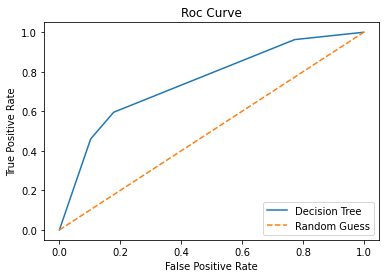

In [19]:
plt.plot(fpr, tpr, '-', ms=2, label='Decision Tree')
plt.plot([0, 1], [0,1], '--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve')
plt.legend(loc='lower right')
plt.show()

# AUC

In [23]:
 from sklearn import metrics
roc_auc = metrics.auc(fpr, tpr)
print('Area Under Curve: %.2f'%roc_auc)

Area Under Curve: 0.75


## Positive와 Negative 클래스를 분류할 가능성이 75%

In [24]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [25]:
def pred_wine():
    Data=[]
    Data.append(float(input("fixed acidity: ")))
    Data.append(float(input("volatile acidity: ")))
    Data.append(float(input("citric acid: ")))
    Data.append(float(input("residual sugar: ")))
    Data.append(float(input("chlorides: ")))
    Data.append(float(input("free sulfur dioxide: ")))
    Data.append(float(input("total sulfur diocide: ")))
    Data.append(float(input("density: ")))
    Data.append(float(input("PH: ")))
    Data.append(float(input("sulphaste: ")))
    Data.append(float(input("alcohol: ")))
    result = tree.predict([Data])
    if result==1: 
        print('high quality')
    else:
        print('low quality')
        
pred_wine()

fixed acidity: 500
volatile acidity: 4
citric acid: 6
residual sugar: 56
chlorides: 451
free sulfur dioxide: 16
total sulfur diocide: 8
density: 84
PH: 6
sulphaste: 1
alcohol: 7
low quality


# 합격여부 분류모델

In [26]:
dt = pd.read_csv('/Users/hayeon/Downloads/student (1).csv')

In [27]:
dt.head()

,gre,gpa,rank,sex,age,nationality,admit
0,380.0,3.61,3,f,19,Korea,불합격
1,660.0,3.67,3,f,18,Korea,NaN
2,800.0,4.00,1,m,19,Korea,합격
3,NaN,3.19,4,m,19,Korea,합격
4,520.0,2.93,4,f,19,Korea,불합격


In [28]:
dt.drop(['nationality'], axis=1, inplace=True)
dt['sex']=dt['sex'].map({'f':0, 'm':1})
dt['admit']=dt['admit'].map({'불합격':0, '합격':1})
dt['gre']=dt['gre'].fillna(dt['gre'].mean())
dt['gpa']=dt['gpa'].fillna(dt['gpa'].mean())
dt.dropna(inplace=True)

In [29]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 399
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gre     398 non-null    float64
 1   gpa     398 non-null    float64
 2   rank    398 non-null    int64  
 3   sex     398 non-null    int64  
 4   age     398 non-null    int64  
 5   admit   398 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 21.8 KB


In [30]:
X = dt.iloc[:, :-1]
y = dt['admit']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [34]:
print('accuracy', accuracy_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))
print('f1-score', f1_score(y_test, y_pred))

accuracy 0.7583333333333333
precision 0.6363636363636364
recall 0.21875
f1-score 0.3255813953488372


In [35]:
fpr, tpr, thersholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])

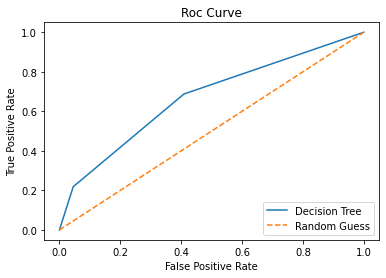

In [36]:
plt.plot(fpr, tpr, '-', ms=2, label='Decision Tree')
plt.plot([0, 1], [0,1], '--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve')
plt.legend(loc='lower right')
plt.show()

In [37]:
roc_auc = metrics.auc(fpr, tpr)
print('Area Under Curve: %.2f'%roc_auc)

Area Under Curve: 0.67


In [39]:
tpr

array([0.     , 0.21875, 0.6875 , 1.     ])

## Positive와 Negative 클래스를 분류할 가능성이 0.67%